<a href="https://colab.research.google.com/github/innosevda/Price-tag-detection-recognition-app/blob/model%2Fpipeline/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NECESSARY INSTALLTIONS

In [1]:
!apt-get install libzbar0
!pip install pyzbar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

# MAIN CODE

Detected Barcode: x=453, y=1926, w=589, h=160
Expanded Bounding Box: x_min=0, x_max=2072, y_min=886, y_max=3126


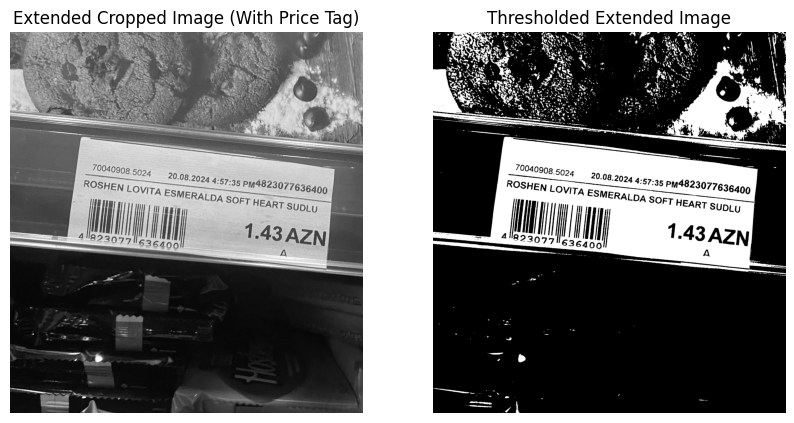

Preprocessed image saved at: price_tag_extended_more.jpg


In [3]:
import cv2
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt

def preprocess_and_extend_area(image_path, output_path, scale_factor_width=4.5, scale_factor_height=14.0, threshold_value=150):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not loaded.")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect barcodes
    barcodes = decode(gray)
    if barcodes:
        # Use the first detected barcode
        barcode = barcodes[0]
        (x, y, w, h) = barcode.rect

        # Check if dimensions are valid
        if w > 0 and h > 0:
            print(f"Detected Barcode: x={x}, y={y}, w={w}, h={h}")

            # Expand the bounding box
            expanded_width = int(w * (scale_factor_width - 1) / 2)
            expanded_height = int(h * (scale_factor_height - 1) / 2)

            x_min = max(int(x - expanded_width), 0)
            x_max = min(int(x + w + expanded_width), gray.shape[1])
            y_min = max(int(y - expanded_height), 0)
            y_max = min(int(y + h + expanded_height), gray.shape[0])

            print(f"Expanded Bounding Box: x_min={x_min}, x_max={x_max}, y_min={y_min}, y_max={y_max}")

            # Crop the expanded area
            extended_image = gray[y_min:y_max, x_min:x_max]

            # Apply thresholding
            _, thresholded_image = cv2.threshold(extended_image, threshold_value, 255, cv2.THRESH_BINARY)

            # Save and display the results
            cv2.imwrite(output_path, thresholded_image)
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(extended_image, cmap='gray')
            plt.title("Extended Cropped Image (With Price Tag)")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(thresholded_image, cmap='gray')
            plt.title("Thresholded Extended Image")
            plt.axis('off')
            plt.show()

            print(f"Preprocessed image saved at: {output_path}")
            return output_path
        else:
            print(f"Error: Detected barcode has invalid dimensions (w={w}, h={h}).")
    else:
        print("No barcode detected. Check image quality.")

    return None

# Test the function
image_path = "/content/drive/MyDrive/test_images_2/Copy of 8 (1).jpeg"  # Replace with your input image path
output_path = "price_tag_extended_more.jpg"  # Output image file path
preprocessed_image_path = preprocess_and_extend_area(image_path, output_path)

### Notes: can detect well if the picture is not very far and taken from the very front